<a href="https://colab.research.google.com/github/edwardsanchez001/lab-time-series/blob/master/Copy_of_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
# Import numpy and pandas
import numpy as np
import pandas as pd


In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [11]:
# Run this code:

sensor = pd.read_csv('/content/drive/MyDrive/Ironhack/lab_time/sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [12]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


In [40]:
sensor.tail()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,times
1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874,2018-01-01 00:29:06
1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738,2018-01-01 00:29:07
1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740,2018-01-01 00:29:08
1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441,2018-01-01 00:29:09
1750,1.869375,-0.596783,2.433775,0.790551,0.561984,0.243315,0.291873,1.102207,-0.436925,-0.065011,-0.042575,0.046052,2018-01-01 00:29:10


In [45]:
sensor[:10]

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,times
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04
5,1.476302,-0.700807,0.669443,0.760912,0.644835,-0.072116,0.187742,-0.763656,0.226057,0.168241,0.145906,0.012455,2018-01-01 00:00:05
6,1.455153,-0.694408,0.662593,0.763300,0.639930,-0.088666,0.343096,-0.803820,0.278468,0.079382,-0.026344,-0.195590,2018-01-01 00:00:06
7,1.441702,-0.690710,0.656459,0.764380,0.637084,-0.099229,0.176202,-0.172756,0.056415,0.069360,0.072678,-0.102920,2018-01-01 00:00:07
8,1.443440,-0.691905,0.651196,0.763796,0.638005,-0.097803,0.274786,0.446585,-0.132766,0.072889,0.079921,-0.075323,2018-01-01 00:00:08
9,1.443071,-0.693039,0.638198,0.763042,0.638878,-0.097993,0.633672,0.316372,-0.115137,0.098347,-0.017021,-0.197310,2018-01-01 00:00:09


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [13]:
# Your code here:
sensor.isnull().sum()


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [14]:
# Your code here:
sensor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [18]:
# Your code here:
times = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10',periods=len(sensor) )
pd.infer_freq(times)



'S'

Assign the time series index to the dataframe's index.

In [61]:
# Your code here:
sensor.set_index(times, inplace=True)


In [62]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,times
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](https://github.com/edwardsanchez001/lab-time-series/blob/master/images/tsa_decompose.png?raw=1)

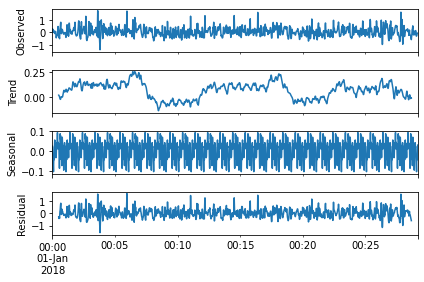

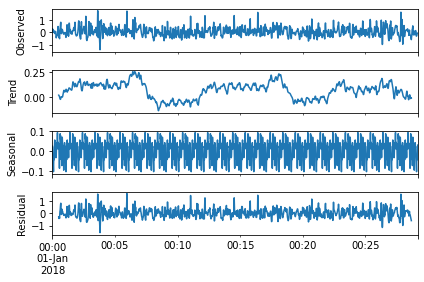

In [63]:
# Your code here:
import statsmodels.api as sample_data
import statsmodels.api as sm


chart = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)
chart.plot()

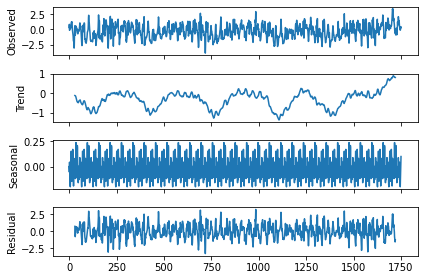

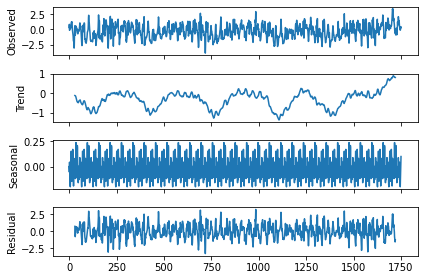

In [26]:
chart = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq=60)
chart.plot()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

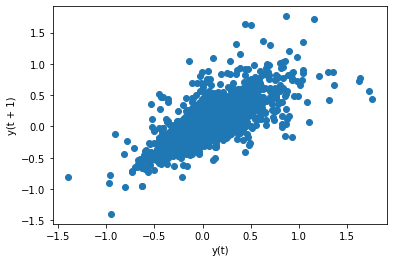

In [28]:
# Your code here:
pd.plotting.lag_plot(sensor['userAcceleration.x'], lag=1)

Create a lag plot for `rotationRate.x`

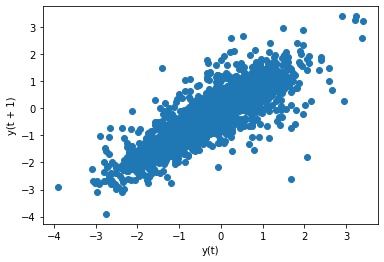

In [29]:
# Your code here:

pd.plotting.lag_plot(sensor['rotationRate.x'], lag=1)

What are your conclusions from both visualizations?

In [ ]:
# Your conclusions here:
They both follow follow a positive corrlation 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [32]:
# Your code here:

from statsmodels.tsa.stattools import adfuller

dftest_acceleration = adfuller(sensor['userAcceleration.x'], autolag=None)

dftest_acceleration

(-8.160095026835913,
 9.193147705719887e-13,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '10%': -2.567662770090317,
  '5%': -2.863216966926812})

In [33]:
dftest_rotation = adfuller(sensor['rotationRate.x'], autolag=None)

dftest_rotation

(-5.269860625086421,
 6.320230335912189e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '10%': -2.567662770090317,
  '5%': -2.863216966926812})

What are your conclusions from this test?

In [ ]:
# Your conclusions here:
que si es estationario


In [64]:
sensor['userAcceleration.x'][:1741]

2018-01-01 00:00:00    0.294894
2018-01-01 00:00:01    0.219405
2018-01-01 00:00:02    0.010714
2018-01-01 00:00:03   -0.008389
2018-01-01 00:00:04    0.199441
                         ...   
2018-01-01 00:28:56   -0.191617
2018-01-01 00:28:57   -0.081173
2018-01-01 00:28:58    0.033395
2018-01-01 00:28:59    0.028120
2018-01-01 00:29:00    0.140211
Name: userAcceleration.x, Length: 1741, dtype: float64

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [70]:
# Your code here:
from statsmodels.tsa.arima_model import ARMA
training = sensor['userAcceleration.x'][:1741]
test = sensor['userAcceleration.x'][1741:]
model = ARMA(training, (2,1), exog=None, dates=None, freq=None, missing='none').fit()
prediction = model.predict(start = test.index[0],end=test.index[-1], dynamic=True)
prediction

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


2018-01-01 00:29:01    0.173149
2018-01-01 00:29:02    0.142896
2018-01-01 00:29:03    0.100522
2018-01-01 00:29:04    0.070106
2018-01-01 00:29:05    0.056099
2018-01-01 00:29:06    0.053778
2018-01-01 00:29:07    0.056790
2018-01-01 00:29:08    0.060646
2018-01-01 00:29:09    0.063316
2018-01-01 00:29:10    0.064493
Freq: S, dtype: float64

In [68]:
test.index

DatetimeIndex(['2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', freq=None)

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [71]:
# Your code here:
from statsmodels.tools.eval_measures import rmse


In [72]:
last_10 = sensor['userAcceleration.x'][1741:]

rmse(last_10, prediction, axis=0)


0.22529863971115618